In [1]:
import pandas as pd
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [2]:
print(titanic_data.head())
print(titanic_data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [4]:
from sklearn.impute import SimpleImputer

# Fill Age with median
age_imputer = SimpleImputer(strategy='median')
titanic_data['Age'] = age_imputer.fit_transform(titanic_data[['Age']])

# Fill Embarked with the most frequent value
embarked_imputer = SimpleImputer(strategy='most_frequent')
titanic_data['Embarked'] = embarked_imputer.fit_transform(titanic_data[['Embarked']])


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    titanic_data[column] = label_encoders[column].fit_transform(titanic_data[column])


In [6]:
X = titanic_data.drop('Survived', axis=1)  # Features
y = titanic_data['Survived']              # Target


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)


In [9]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [10]:
y_pred = model.predict(X_test)


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{confusion}")


Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[90 15]
 [19 55]]


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


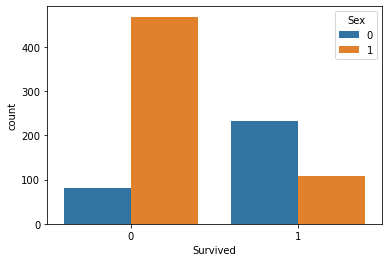

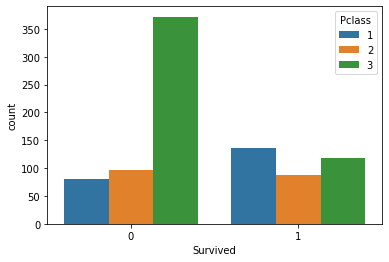

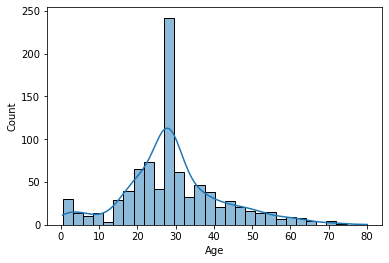

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rates by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.show()

# Survival rates by class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.show()

# Distribution of age
sns.histplot(titanic_data['Age'], kde=True, bins=30)
plt.show()


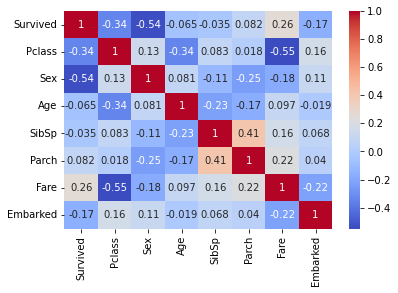

In [14]:
corr_matrix = titanic_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [15]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']


In [16]:
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 0).astype(int)


In [17]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins, labels=labels)


In [19]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins, labels=labels)

label_encoders['AgeGroup'] = LabelEncoder()
titanic_data['AgeGroup'] = label_encoders['AgeGroup'].fit_transform(titanic_data['AgeGroup'])


In [20]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins, labels=labels)


In [21]:
titanic_data['AgeGroup'] = label_encoders['AgeGroup'].fit_transform(titanic_data['AgeGroup'])


In [22]:
from sklearn.preparocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())


In [ ]:
print(y.value_counts())


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [28]:
import joblib

joblib.dump(model, 'titanic_survival_model.pkl')


['titanic_survival_model.pkl']

In [30]:
import pandas as pd

new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1], 
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [2]  
})


In [32]:
predictions = loaded_model.predict(new_data)
print("Predicted Survival (0 = Did not survive, 1 = Survived):", predictions)


Predicted Survival (0 = Did not survive, 1 = Survived): [0]


In [33]:
import joblib
import pandas as pd

loaded_model = joblib.load('titanic_survival_model.pkl')

new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],  
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [2]  
})

# Predict survival
predictions = loaded_model.predict(new_data)
print("Predicted Survival (0 = Did not survive, 1 = Survived):", predictions)


Predicted Survival (0 = Did not survive, 1 = Survived): [0]
